# Homework 2 Regression Refresher

In class, we considered a very simply algorithm called gradient descent that we used to estimate the parameters of a simple linear model. But we left many considerations open. These include:
- Normalization 
    - We saw that the SSE is a very big number in our example, leading us to choose awkwardly small learning rates. Normaling the error may help us use more reasonably sized learning rates.
- When to stop
    - We can tell the algorithm to stop after a set number of iterations or, something smarter, tell it to stop when it begins to take very small step sizes
- Multiple solutions
    - It should be obvious that gradient descent, as an algorithm, doesn't do much "thinking". 
    - If there are multiple solutions, it will only find one
        

## Problem 1 - Use gradient descent to identify multiple minima

Regression algorithms ultimately search for minima. This can be where an error function is minimized (as we saw in class) or when a polynomial equation is minimized. Using the code from our lecture, adapt the code in order to indentify the roots of the following equation: 

$x^3 - 6x^2 +11x = 6$
  
- Look at homework 1 for how to tackle this problem.
- Since the polynomial will have more than 1 solution, be sure to consider multiple starting guesses. 
- Use the "roots" function from numpy to check your answer. Roots is especially designed for polynomials and should find all roots.

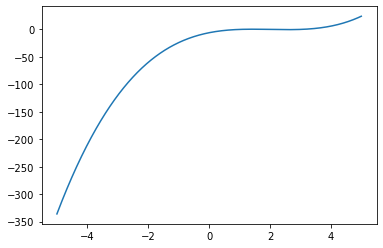

In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

#Setting up x and f(x) relation and plotting to get a feel for it

x = np.linspace(-5,5,1000)
def f(x):
    a = 1.
    b = -6.
    c = 11.
    d = -6.
    return a*x**3+b*x**2+c*x+d

polycoeff = [1,-6,11,-6]
y = f(x)
plt.plot(x,y)

In [2]:
#This code is from the lecture material and it sets up the SSE calculations
def SSE(sols):
    err = f(sols)              #Since we are trying to find where y = 0, then the error is just predicted_y-0 = predicted_y
    sumse = np.zeros(3)
    for i in range(len(sols)):
        sumse[i] = np.sum(err[i]**2)
    return sumse

#Derivative
def derivative(sols):
    DERIVATIVE = 6*sols**5-60*sols**4+232*sols**3-432*sols**2+386*sols-132
    return DERIVATIVE


guesses = np.array([0,1.5,5])
rate = 0.00001

#SSE(guesses)
newval = np.zeros(3)
for m in range(len(guesses)):
    n = 0
    while n < 1000000:
        newval[m] = guesses[m] - rate * derivative(guesses[m])
        n=n+1
        guesses[m] = newval[m]
        
print(newval)

#Check with np.roots solver
solver = np.roots(polycoeff)
print(solver)

[1. 2. 3.]
[3. 2. 1.]


#### Solving gradient descent yielded two solutions for this function while the np.roots solver yielded three.

The grad descent method produced three solutions at x=1,2,3. Solving by hand shows that the three solutions obtained with this method were accurate.

The roots solver obtained the same solutions, supporting the analysis done via gradient descent. 

## Problem 2 - Linear regression can be used to analyze "groups"

In class, we used linear regression to fit a linear model to height and weight data. In this case, the measurements (x) and the outcomes (y) are continuous. Linear regression is also commonly used to analyze groups, wherein the measurements are not continous. For example, we may have measured the height of persons who did or did not eat asparagus when they were young. In this case, x is discrete - a collection of 1's and 0's. 

Let's use linear regression to analyze the miles per gallon achieved by select type of cars. Download the data from https://gist.github.com/noamross/e5d3e859aa0c794be10b. We want to determine if 8 cylinder vehicles get less gas mileage than 4 and 6 cylinder cars. Cyl = cylinders; MPG = miles per gallon on the table.

### a) Write the code to determine the average MPG for 8 cylinder vehicles vs 4/6 cyl vehicle.
Be sure the mean values are clearly identified or report them in a new markup cell below the code. Be sure that you are treating 4 and 6 cyl vehicles as one group.

In [3]:
#Loading data from a text file
dat=np.loadtxt(open("cars.csv", "rb"), delimiter=",", skiprows=1,usecols=np.arange(1,12))
#print(dat)
#I removed the vehicle names because it was giving me issues and it's not necessary for this specific problem

Cyl = dat[:,1]
#print(Cyl)

MPG = dat[:,0]
#print(MPG)

#Determining average MPG's for 8 versus 6/4 cylinder vehicles
ecounter = 0
sfcounter = 0
esum=0
sfsum=0
for i in range(len(MPG)):
    if Cyl[i] == 8.:
        esum = esum + MPG[i]
        ecounter = ecounter + 1
    else:
        sfsum = sfsum + MPG[i]
        sfcounter = sfcounter+1

eavg = esum/ecounter
sfavg = sfsum/sfcounter


print(f'Eight cylinder vehicles get {eavg:.3} MPG on average')
print(f'Six and Four cylinder vehicles get {sfavg:.3} MPG on average')

Eight cylinder vehicles get 15.1 MPG on average
Six and Four cylinder vehicles get 24.0 MPG on average


### b) Analyze using linear regression
To analyze with linear regression, we have to create a linear model. Here, our y is the MPG. But x is not a continous variable - it's a group variable. 

- Let's create a "Group" column in our data, where a 1 indicates that a vehicle has a 8 cyl engine and a 0 to indicate a 4 or 6 cylinder vehicle. 
- Use the linear regression **mathematical code** (do not use packages; perform the matrix algrebra) from class to calculate the slope and intercept. Feel free to check your answer using on the packages demonstrated in class.
- Report the slope and intercept in a text box below your code. 
- In the text box, also compare the calculated slope and intercept to the values of the means calculated above. Do you notice any obvious relationships?



Our intercept is  23.97222222222222 and our slope is -8.872222222222222
Our slope when we force the intercept to be zero =  [15.1]


Text(0, 0.5, 'MPG')

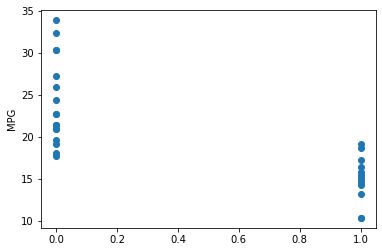

In [4]:
#Adding a binary array based on 8 vs 6/4 cylinders
comp = np.zeros(len(Cyl))
for i in range(len(Cyl)):
    if Cyl[i] == 8.:
        comp[i] = 1
    else:
        comp[i] = 0
X = np.c_[np.ones(len(MPG)),comp]
#print(X)

#Using linear algebra data from the lecture file
from numpy.linalg import inv
tmp = inv(np.matmul(np.transpose(X),X))
INTERCEPT, SLOPE = tmp @ np.transpose(X) @ MPG
print("Our intercept is ",INTERCEPT, "and our slope is", SLOPE)

X = np.c_[comp]
tmp = inv(np.matmul(np.transpose(X),X))

SLOPE = tmp @ np.transpose(X) @ MPG
print("Our slope when we force the intercept to be zero = ",SLOPE)

plt.plot(comp,MPG,'o')
plt.ylabel('MPG')

In [5]:
import statsmodels.api as sm
model = sm.OLS(MPG, sm.add_constant(comp)).fit()

# erase the add constant above to remove the intercept of the model.
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     36.74
Date:                Fri, 09 Sep 2022   Prob (F-statistic):           1.17e-06
Time:                        12:59:44   Log-Likelihood:                -89.584
No. Observations:                  32   AIC:                             183.2
Df Residuals:                      30   BIC:                             186.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.9722      0.968     24.761      0.0

In [6]:
import statsmodels.api as sm
model = sm.OLS(MPG, comp).fit()

# erase the add constant above to remove the intercept of the model.
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.227
Model:                            OLS   Adj. R-squared (uncentered):              0.202
Method:                 Least Squares   F-statistic:                              9.120
Date:                Fri, 09 Sep 2022   Prob (F-statistic):                     0.00503
Time:                        12:59:44   Log-Likelihood:                         -138.63
No. Observations:                  32   AIC:                                      279.3
Df Residuals:                      31   BIC:                                      280.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Analysis of answer to (b):

Our intercept is 23.97 and our slope is -8.87
Our slope when we force the intercept to be zero =  15.1

The slope is equivalent to the average 8 cylinder MPG value that was calculated above when the intercept is forced to be zero. 
The slope is equivalent to the average 6/4 cylinder MPG value that was calculated above when an intercept is allowed.

These results were verified via the regression package.
